In [7]:
import numpy as np

import os
import glob #tqdm
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from tensorflow.keras.utils import to_categorical

# Neural Network
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# OpenCV
import cv2

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
testimageDatasetspath = "DataSet/train/"
datasetsNamesTest = os.listdir(testimageDatasetspath)

In [3]:
image_width = 28
image_height = 28

In [9]:
def imageFeatureExtract(image, size = (28, 28)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.expand_dims(gray, 2)#(28, 28, 1)
    return gray

In [18]:
Datasetspath = "DataSet/train/"
datasetPath = os.path.join(Datasetspath, "*g")
fileRead = glob.glob(datasetPath)

data = []
category_or_class = []

for (i, file) in enumerate(fileRead):
    image = cv2.imread(file)
    feature = imageFeatureExtract(image)
    data.append(feature)
    classNames = file.split(os.path.sep)[-1].split(".")[0]
    category_or_class.append(classNames)


In [19]:
# Datasets Scalling
data = np.array(data, dtype = np.uint8)
labels = np.array(category_or_class)
labels

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [16]:
data.shape

(1, 28, 28, 1)

In [20]:
np.unique(category_or_class)

array(['cat', 'dog'], dtype='<U3')

#### Step 01: Label Encoder

In [26]:
labels  = np.array(category_or_class)
label_Encoder = LabelEncoder()
#label_Encoder = preprocessing.LabelEncoder
classNames = label_Encoder.fit_transform(labels)
classNames

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
np.unique(classNames)

array([0, 1], dtype=int64)

#### Step 02: OneHotEncoding

In [25]:
oneHotEncoder = OneHotEncoder(sparse = False)
label_EncoderValue = classNames.reshape(len(classNames), 1)
print(label_EncoderValue)
oneHotEncoderValues = oneHotEncoder.fit_transform(label_EncoderValue)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [14]:
oneHotEncoderValues

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [15]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, oneHotEncoderValues, test_size=0.2, random_state=42)

In [16]:
model = Sequential() # Empty 

# 1st layer
model.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", input_shape = (28, 28, 1), padding = "same"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# 2nd Layer
model.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", padding = "valid"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# Flatten Layer
model.add(Flatten())

# Output Layer
model.add(Dense(120, activation = "tanh"))
model.add(Dense(84, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))

In [17]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [19]:
model.fit(X_train, Y_train,
          epochs = 10,
          validation_data = (X_test, Y_test), 
          verbose = 1)

Epoch 1/10
625/625 [==============================] - 20s 16ms/step - loss: 0.6678 - accuracy: 0.5968 - val_loss: 0.6560 - val_accuracy: 0.6174
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.6399 - accuracy: 0.6375 - val_loss: 0.6307 - val_accuracy: 0.6404
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.6221 - accuracy: 0.6562 - val_loss: 0.6237 - val_accuracy: 0.6496
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6088 - accuracy: 0.6696 - val_loss: 0.6103 - val_accuracy: 0.6746
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.5942 - accuracy: 0.6860 - val_loss: 0.6066 - val_accuracy: 0.6692
Epoch 6/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5804 - accuracy: 0.6928 - val_loss: 0.6030 - val_accuracy: 0.6800
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5680 - accuracy: 0.7073 - val_loss: 0.5966 - val_accuracy: 0.

In [28]:
class LeNet_Model(Sequential):
    
    def __init__(self, input_shape, number_class):
        super().__init__()
        
        # 1st layer
        self.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", input_shape = input_shape, padding = "same"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # 2nd Layer
        self.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", padding = "valid"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # Flatten Layer
        self.add(Flatten())

        # Output Layer
        self.add(Dense(120, activation = "tanh"))
        self.add(Dense(84, activation = "tanh"))
        self.add(Dense(number_class, activation = "softmax"))
        
        self.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
        

In [29]:
input_shapes = X_train[0].shape
number_class = len(np.unique(labels))

In [30]:
myModel = LeNet_Model(input_shapes, number_class)

In [31]:
myModel.summary()

Model: "le_net__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)             

In [32]:
import datetime
logsData = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = tf.keras.callbacks.TensorBoard(log_dir = logsData, histogram_freq = 1)

In [33]:
history = model.fit(X_train, Y_train,
          epochs = 100,
          validation_data = (X_test, Y_test),
          callbacks=[callbacks],
          verbose = 1)

Epoch 1/100
625/625 [==============================] - 14s 23ms/step - loss: 0.5016 - accuracy: 0.7547 - val_loss: 0.6003 - val_accuracy: 0.6858
Epoch 2/100
625/625 [==============================] - 16s 25ms/step - loss: 0.4878 - accuracy: 0.7638 - val_loss: 0.6206 - val_accuracy: 0.6718
Epoch 3/100
625/625 [==============================] - 14s 23ms/step - loss: 0.4650 - accuracy: 0.7768 - val_loss: 0.6242 - val_accuracy: 0.6756
Epoch 4/100
625/625 [==============================] - 10s 16ms/step - loss: 0.4412 - accuracy: 0.7944 - val_loss: 0.6263 - val_accuracy: 0.6778
Epoch 5/100
625/625 [==============================] - 11s 17ms/step - loss: 0.4225 - accuracy: 0.8063 - val_loss: 0.6296 - val_accuracy: 0.6858
Epoch 6/100
625/625 [==============================] - 11s 17ms/step - loss: 0.3944 - accuracy: 0.8209 - val_loss: 0.6811 - val_accuracy: 0.6632
Epoch 7/100
625/625 [==============================] - 11s 17ms/step - loss: 0.3640 - accuracy: 0.8401 - val_loss: 0.7041 - val_ac

In [62]:
#%load_ext tensorboard

In [63]:
#%tensorboard --logdir logs/fit

In [20]:
model.save("Models/CatsAndDogs.h5")

In [4]:
class_data = ["cat", 'dog']
saveModelData = load_model("Models/CatsAndDogs.h5")

In [7]:
testImageData = cv2.imread("DataSet/test/1.jpg")
testImageDataFeature = imageFeatureExtract(testImageData)/255.0
testImageDataFeature = np.array([testImageDataFeature])

In [8]:
testImageDataFeature.shape

(1, 28, 28, 1)

In [13]:
predict = saveModelData.predict(testImageDataFeature)[0]

In [18]:
probability = saveModelData.predict(testImageDataFeature)

In [19]:
probabilityMaximum = predict.argmax(axis = 0)
probabilityMaximum

0

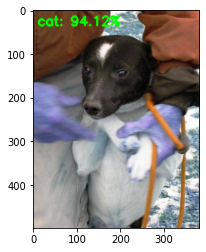

In [20]:
imageDataLabels = "{}: {:.2f}%".format(class_data[probabilityMaximum], predict[probabilityMaximum]*100)
cv2.putText(testImageData, imageDataLabels, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

plt.imshow(testImageData, cmap = "gray")
plt.show()